# Project Title : Customer Churn Analysis and  Prediction  

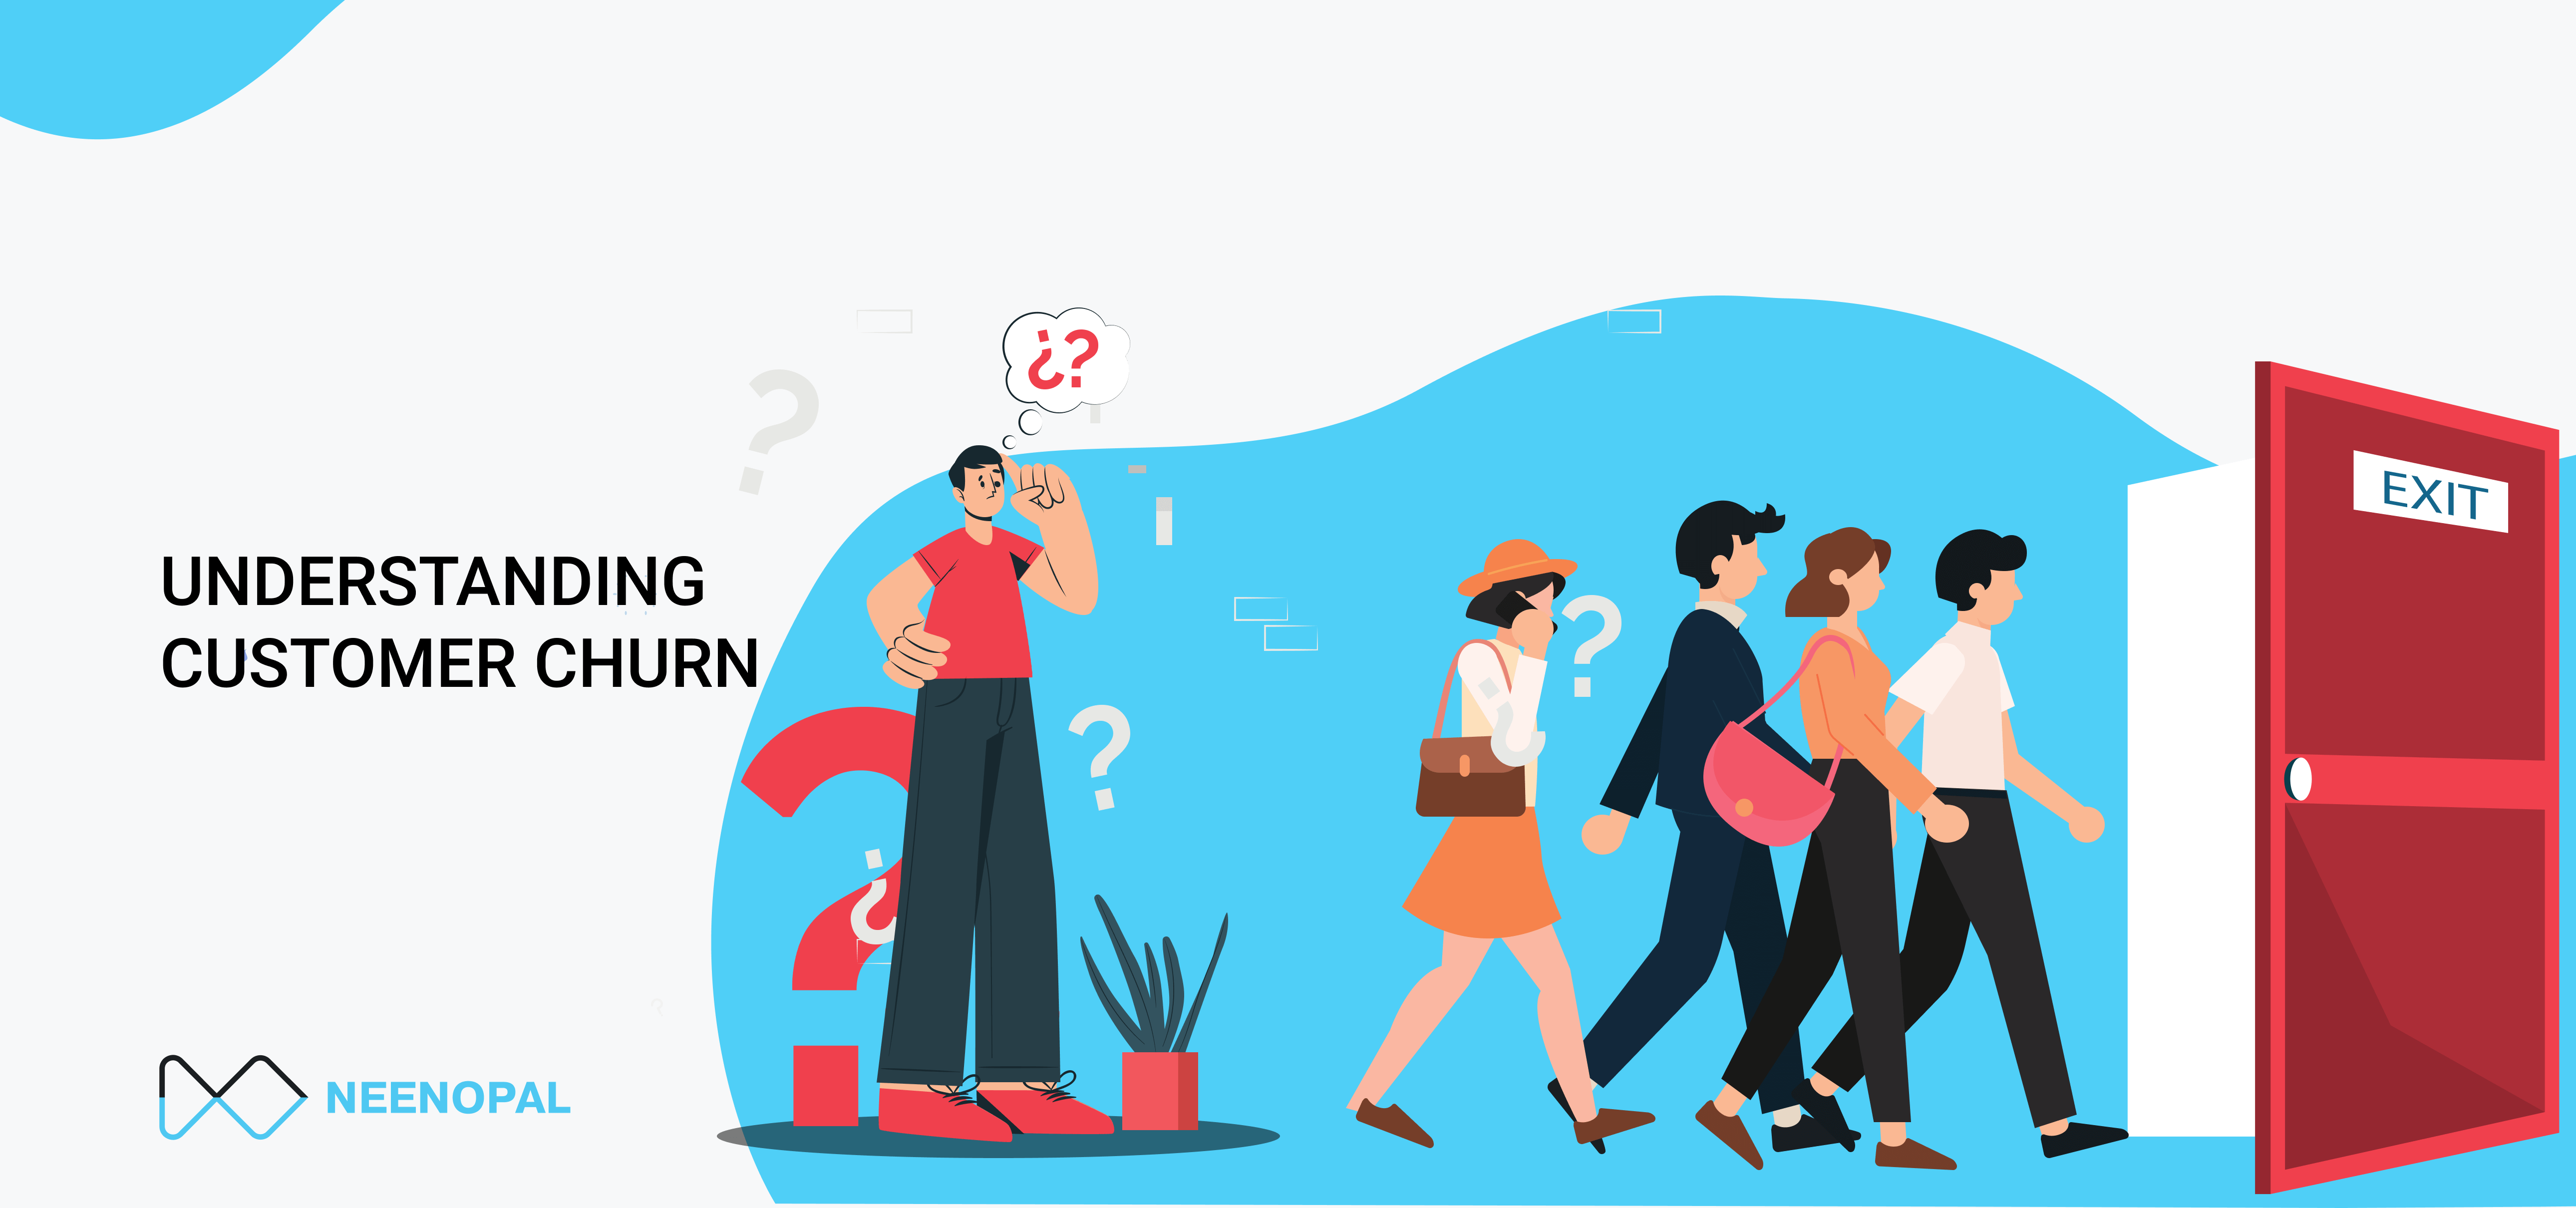

In [170]:
from IPython.display import Image
Image(filename='1.png')

## Project Overview :
## The project aims to analyze customer churn in a telecommunications company and develop predictive models to identify at-risk customers. The ultimate goal is to provide actionable insights and recommendations to reduce churn and improve customer retention.

# 1- Data Cleaning and Preprocessing

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score ,recall_score ,f1_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('Telco_Customer_Churn.csv')

### Explore Data

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df.shape

(7043, 21)

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df=df.drop(['customerID'],axis=1)

In [31]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [32]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [33]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [34]:
# replace ' ' with nan

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [35]:
# transform total 'TotalCharges' column from object to float

df['TotalCharges'] = df['TotalCharges'].astype(float)

In [36]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [38]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [39]:
df=df.dropna()

In [40]:
object_data=df.select_dtypes(include='object')
non_object_data = df.select_dtypes(exclude='object')

In [41]:
object_data.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [42]:
object_data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [43]:
object_data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [44]:
object_data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [45]:
object_data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

# 2- Exploratory Data Analysis (EDA)

In [47]:
object_data=df.select_dtypes(include='object')
non_object_data = df.select_dtypes(exclude='object')

<Axes: >

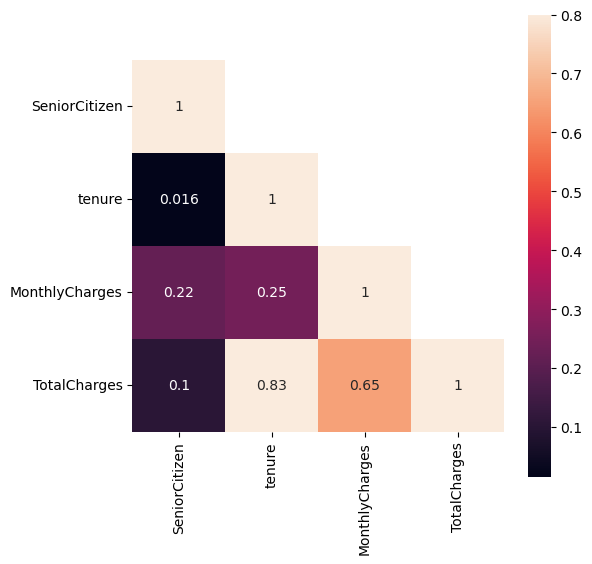

In [158]:
corrMatt = non_object_data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(6,6)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

### Calculation and visualization the overall churn rate

In [50]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: ylabel='count'>

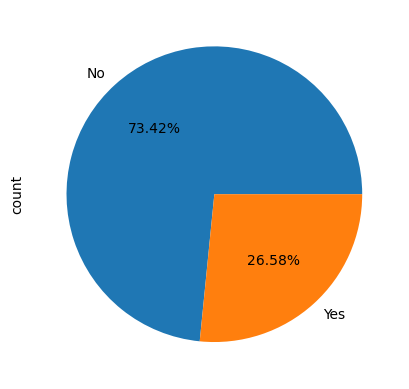

In [51]:
df.Churn.value_counts().plot.pie(autopct='%0.2f%%')

### Explore customer distribution by various demographics

In [53]:
df['gender'].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

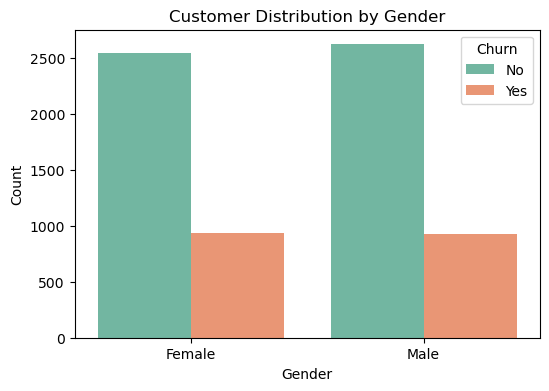

In [156]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Analyze tenure distribution

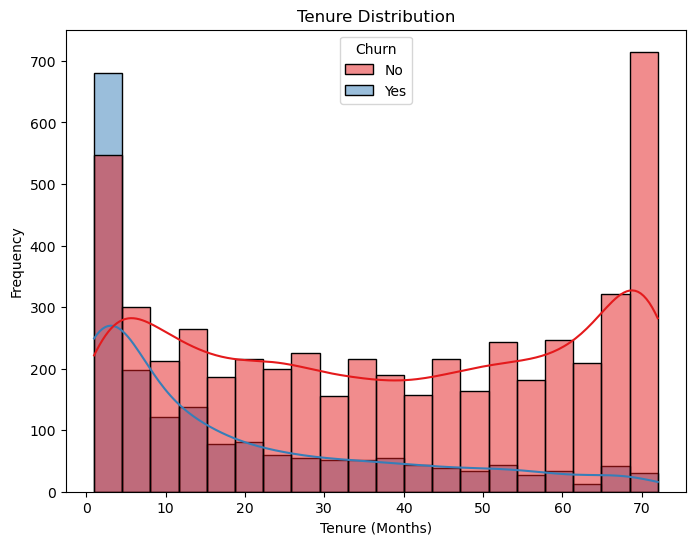

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=20, palette='Set1')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

### Investigate relationships between churn and different contract types

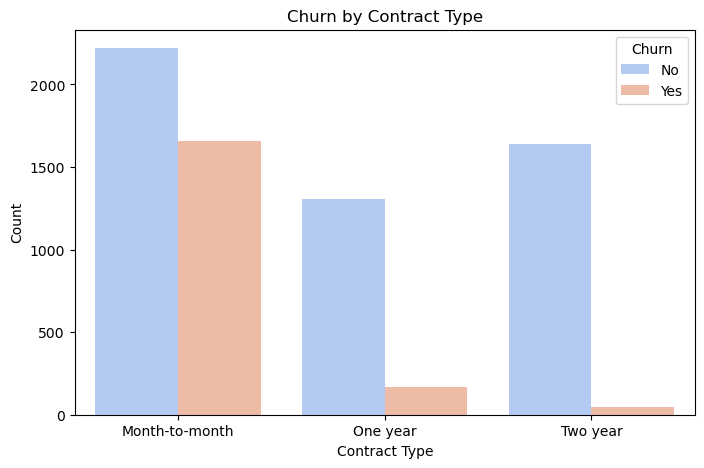

In [154]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

### Investigate relationships between churn and payment methods

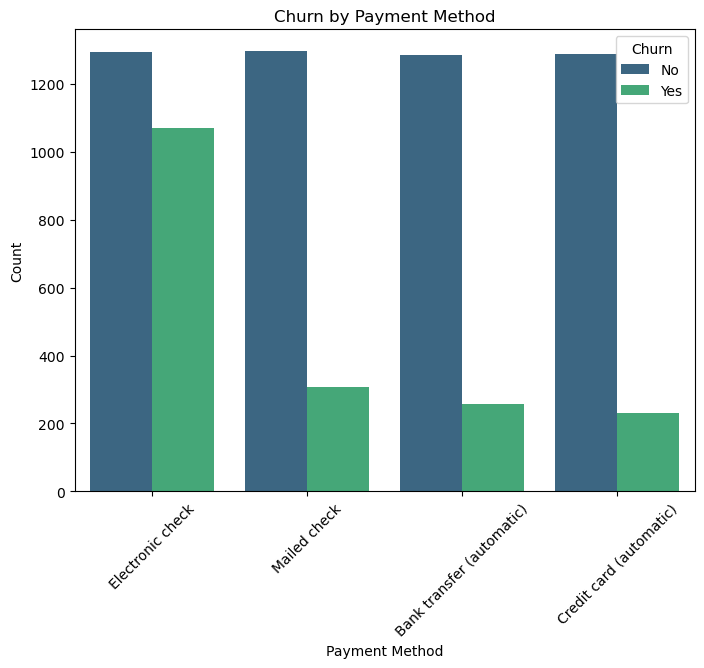

In [152]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='viridis')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

# 3- Customer Segmentation

### Segment customers based on (Tenure)

In [63]:
# Less than 12 months, 12-24 months, more than 24 months

bins_tenure = [0, 12, 24, np.inf]   
labels_tenure = ['Short-term', 'Mid-term', 'Long-term']
df['Tenure_Group'] = pd.cut(df['tenure'], bins=bins_tenure, labels=labels_tenure)

In [64]:
df['Tenure_Group'].value_counts()

Tenure_Group
Long-term     3833
Short-term    2175
Mid-term      1024
Name: count, dtype: int64

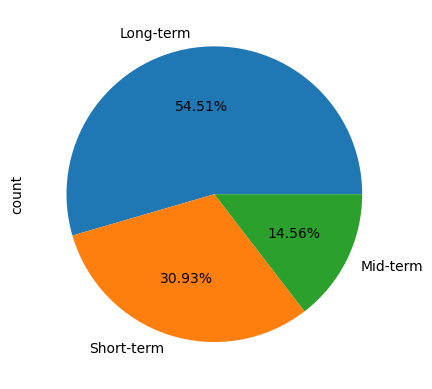

In [65]:
df['Tenure_Group'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

### Segment customers based on monthly charges

In [67]:
df['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

[Text(0, 0.5, 'MonthlyCharges'), Text(0.5, 1.0, 'Box Plot On MonthlyCharges')]

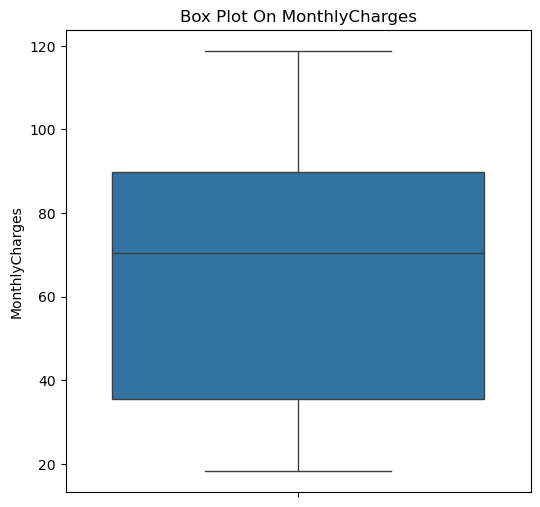

In [68]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(6, 6)
sns.boxplot(data=df,y="MonthlyCharges",orient="v",ax=axes)

axes.set(ylabel='MonthlyCharges',title="Box Plot On MonthlyCharges")

In [69]:
# Less than $50, $50-100, more than $100

bins_charges = [0, 50, 100, np.inf] 
labels_charges = ['Low', 'Medium', 'High']
df['Monthly_Charges_Group'] = pd.cut(df['MonthlyCharges'], bins=bins_charges, labels=labels_charges)

In [70]:
df['Monthly_Charges_Group'].value_counts()

Monthly_Charges_Group
Medium    3837
Low       2293
High       902
Name: count, dtype: int64

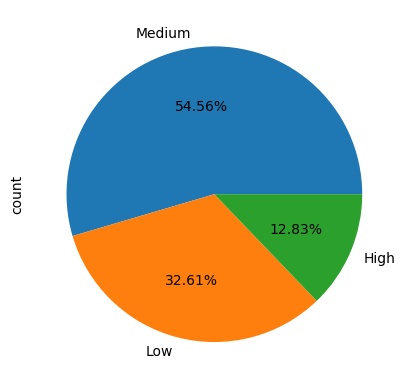

In [71]:
df['Monthly_Charges_Group'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

In [72]:
df[['tenure', 'Tenure_Group', 'MonthlyCharges', 'Monthly_Charges_Group', 'Contract']].head()

,tenure,Tenure_Group,MonthlyCharges,Monthly_Charges_Group,Contract
0,1,Short-term,29.85,Low,Month-to-month
1,34,Long-term,56.95,Medium,One year
2,2,Short-term,53.85,Medium,Month-to-month
3,45,Long-term,42.30,Low,One year
4,2,Short-term,70.70,Medium,Month-to-month


### Customer abandonment rate based on length of stay

Churn                No        Yes
Tenure_Group                      
Short-term    52.321839  47.678161
Mid-term      71.289062  28.710938
Long-term     85.963997  14.036003


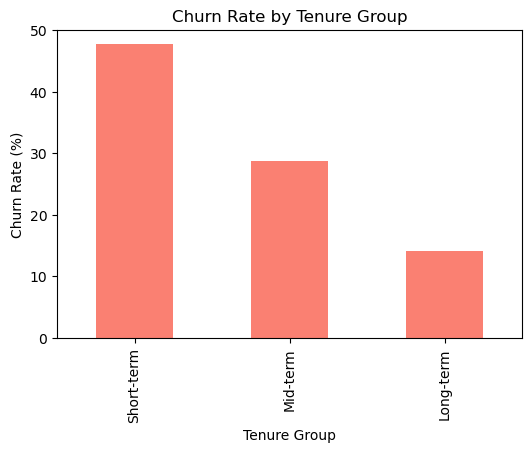

In [74]:
churn_by_tenure = df.groupby('Tenure_Group')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_tenure)

plt.figure(figsize=(6, 4))
churn_by_tenure['Yes'].plot(kind='bar', color='salmon')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.show()

### Customer churn rate based on monthly fees

Churn                         No        Yes
Monthly_Charges_Group                      
Low                    84.256433  15.743567
Medium                 67.292155  32.707845
High                   71.951220  28.048780


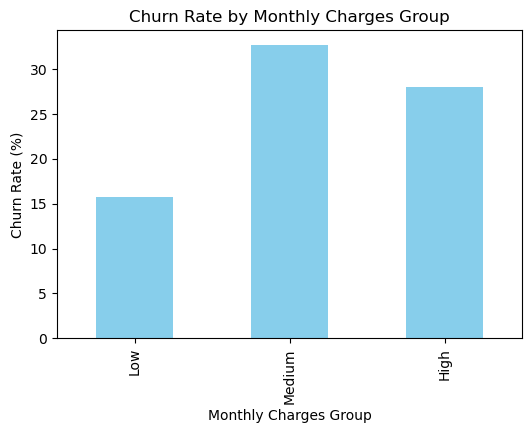

In [76]:
churn_by_charges = df.groupby('Monthly_Charges_Group')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_charges)

plt.figure(figsize=(6, 4))
churn_by_charges['Yes'].plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Monthly Charges Group')
plt.xlabel('Monthly Charges Group')
plt.ylabel('Churn Rate (%)')
plt.show()

### Customer abandonment rate based on contract type

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


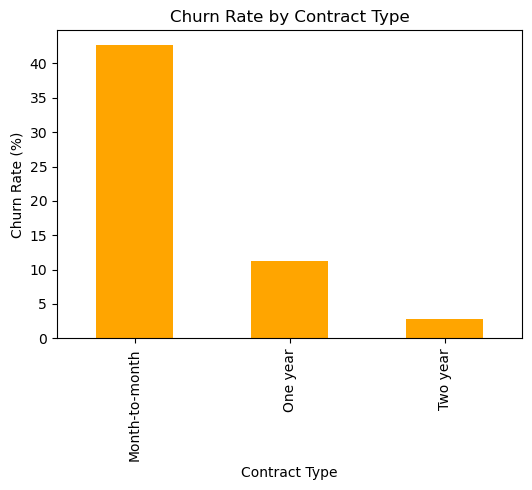

In [78]:
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_contract)

plt.figure(figsize=(6, 4))
churn_by_contract['Yes'].plot(kind='bar', color='orange')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.show()

### Customer abandonment analysis across multiple groups (tenure + monthly charges)

Churn                                      No        Yes
Tenure_Group Monthly_Charges_Group                      
Short-term   Low                    68.988030  31.011970
             Medium                 40.829876  59.170124
             High                   23.529412  76.470588
Mid-term     Low                    89.518414  10.481586
             Medium                 63.458401  36.541599
             High                   43.103448  56.896552
Long-term    Low                    96.180215   3.819785
             Medium                 84.249629  15.750371
             High                   77.175284  22.824716


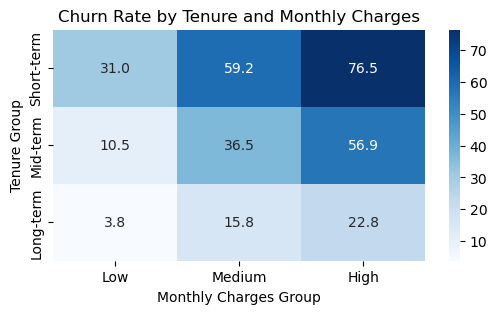

In [80]:
churn_by_tenure_charges = df.groupby(['Tenure_Group', 'Monthly_Charges_Group'])['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_tenure_charges)

plt.figure(figsize=(6, 3))
sns.heatmap(churn_by_tenure_charges['Yes'].unstack(), annot=True, cmap='Blues', fmt='.1f')
plt.title('Churn Rate by Tenure and Monthly Charges')
plt.xlabel('Monthly Charges Group')
plt.ylabel('Tenure Group')
plt.show()

# 4- Churn Prediction Model

In [82]:
for i in object_data.columns:
    print(f'{i} : {object_data[i].nunique()}')

gender : 2
Partner : 2
Dependents : 2
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
Churn : 2


### Transform Data by using LabelEncoding for columns containing number of categories = 2

In [84]:
object_data_1 = object_data.drop(['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                            'Contract','PaymentMethod'],axis=1)
object_data_1.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,Female,Yes,No,No,Yes,No
1,Male,No,No,Yes,No,No
2,Male,No,No,Yes,Yes,Yes
3,Male,No,No,No,No,No
4,Female,No,No,Yes,Yes,Yes


In [85]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in range(0,object_data_1.shape[1]):
    object_data_1.iloc[:,i] = label.fit_transform(object_data_1.iloc[:,i])
    
object_data_1=object_data_1.astype(int)

object_data_1.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1


### Transform Data by using OneHotEncoding for columns containing number of categories > 2

In [87]:
object_data_2 = object_data[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                            'Contract','PaymentMethod']]
object_data_2.sample(5)

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
2014,No,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,Bank transfer (automatic)
3847,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Credit card (automatic)
38,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Electronic check
633,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Mailed check
1899,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Credit card (automatic)


In [88]:
object_data_2 = pd.get_dummies(object_data_2)

object_data_2 = object_data_2.astype(int)

object_data_2.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [89]:
dff = pd.concat([non_object_data, object_data_1,object_data_2], axis=1)
dff.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0


In [90]:
dff.shape

(7032, 41)

In [91]:
x = dff.iloc[:,:-1]
y = dff.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1234)

In [92]:
model=LogisticRegression()

model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(pred,y_test)
recall = recall_score(pred,y_test)
f1 = f1_score(pred,y_test)

print(model)
print('accuracy : ',accuracy)
print('recall : ',recall)
print('f1 : ',f1)

LogisticRegression()
accuracy :  0.9957345971563981
recall :  0.9957173447537473
f1 :  0.9904153354632588


In [150]:
import joblib
joblib.dump(model, 'Telco_Customer_Churn.pkl')

['Telco_Customer_Churn.pkl']